In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Dataset
Dataset link on kaggle:
https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

In [2]:
data = pd.read_csv('insurance.csv') 
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.shape

(1338, 7)

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check Null Values

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Check Duplicated Rows

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(1337, 7)

In [10]:
data.duplicated().sum()

0

In [12]:
print(data['smoker'].unique())
print(data['region'].unique())
print(data['sex'].unique())

['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']


# Handling Categorical Features

## Binary Encoding

In [13]:
data['smoker'].replace({'yes':1, 'no':0}, inplace=True)


In [14]:
data['sex'].replace({'male':0, 'female':1}, inplace=True)

## One-hot Encoding

In [15]:
clean_data = pd.get_dummies(data)

In [16]:
clean_data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [17]:
clean_data['smoker'].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

In [18]:
clean_data['sex'].value_counts()

0    675
1    662
Name: sex, dtype: int64

In [19]:
#plt.style.available

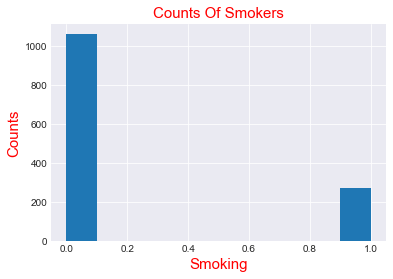

In [21]:
plt.style.use("seaborn-darkgrid")
plt.hist(clean_data['smoker'])
plt.title('Counts Of Smokers', size=15, color='red')
plt.xlabel('Smoking', size=15,color='red')
plt.ylabel('Counts', size=15,color='red')
plt.show()

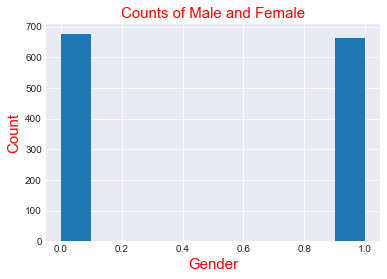

In [24]:
plt.hist(clean_data['sex'])
plt.title('Counts of Male and Female', size=15, color='red')
plt.xlabel('Gender',size=15, color='red')
plt.ylabel('Count',size=15, color='red')
plt.show()

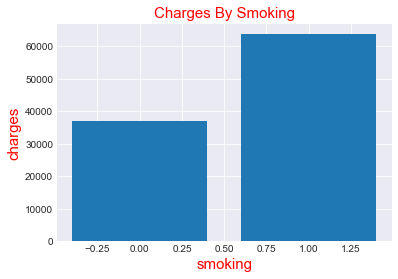

In [23]:
plt.bar(clean_data['smoker'], clean_data['charges'])
plt.title('Charges By Smoking', size=15, color='red')
plt.xlabel('smoking',size=15, color='red')
plt.ylabel('charges',size=15, color='red')
plt.show()

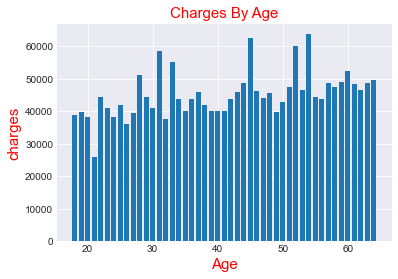

In [25]:
plt.bar(clean_data['age'], clean_data['charges'])
plt.title('Charges By Age', size=15, color='red')
plt.xlabel('Age',size=15, color='red')
plt.ylabel('charges',size=15, color='red')
plt.show()

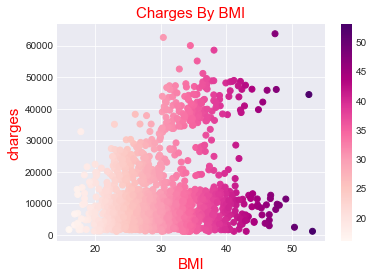

In [26]:
plt.scatter(clean_data['bmi'], clean_data['charges'], c=clean_data['bmi'], cmap='RdPu')
cbar = plt.colorbar()
#cbar.set_label('Ages')
plt.title('Charges By BMI', size=15, color='red')
plt.xlabel('BMI',size=15, color='red')
plt.ylabel('charges',size=15, color='red')
plt.show()

In [27]:
clean_data.groupby('smoker')['charges'].mean()

smoker
0     8440.660307
1    32050.231832
Name: charges, dtype: float64

In [28]:
clean_data.groupby('children')['charges'].mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [29]:
clean_data.groupby('children')['bmi'].mean()

children
0    30.550227
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64

In [73]:
clean_data.groupby('sex')['charges'].mean()

sex
0    13956.751178
1    12569.578844
Name: charges, dtype: float64

In [30]:
clean_data.groupby('bmi')['charges'].mean()

bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.192150
              ...     
48.070     9432.925300
49.060    11381.325400
50.380     2438.055200
52.580    44501.398200
53.130     1163.462700
Name: charges, Length: 548, dtype: float64

In [31]:
clean_data.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.298308,0.001868,0.001495,-0.012311,0.009415
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.058044,0.002008,0.012482,-0.017578,0.003767
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.198401,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.067389,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.787234,0.002597,-0.036321,0.068282,-0.037168
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,1.000000,0.005945,-0.038695,0.073578,-0.043637
region_northeast,0.001868,0.002008,-0.138178,-0.023202,0.002597,0.005945,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,0.012482,-0.136138,0.026044,-0.036321,-0.038695,-0.319842,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,-0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,-0.345909,1.000000,-0.346614
region_southwest,0.009415,0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.320493,-0.346614,1.000000


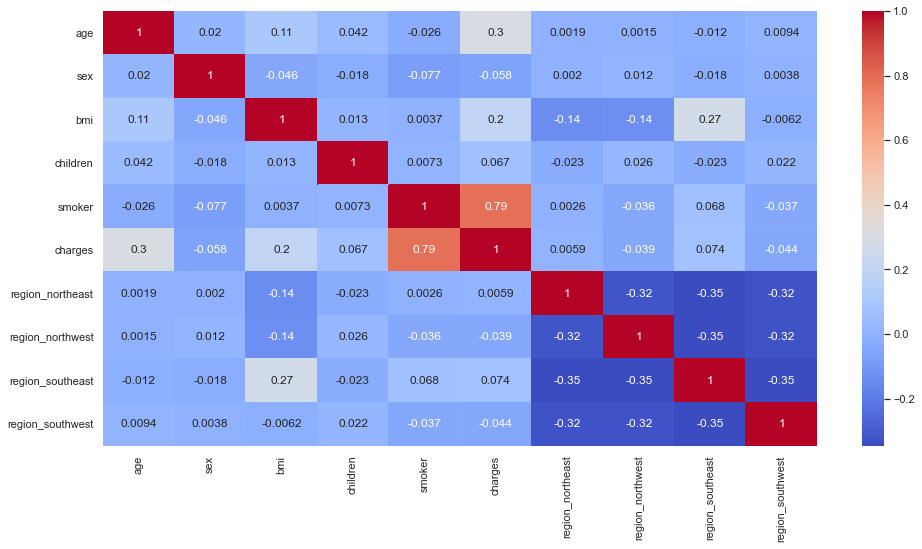

In [32]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(clean_data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


In [33]:
X = clean_data.drop(columns=['charges'])
y = clean_data['charges']

In [34]:
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0
1334,18,1,31.920,0,0,1,0,0,0
1335,18,1,36.850,0,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,0,1


In [107]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Splitting Dataset

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
print(x_train.shape)
print(y_train.shape)
print('-------------')
print(x_test.shape)
print(y_test.shape)

(935, 9)
(935,)
-------------
(402, 9)
(402,)


# Linear Regression Model

In [38]:
reg_clf = LinearRegression()
reg_clf.fit(x_train, y_train )

LinearRegression()

In [39]:
y_pred = reg_clf.predict(x_train)

In [41]:
train_acc = r2_score(y_train, y_pred)
print("Training Accuracy is ",train_acc)

Training Accuracy is  0.7424256213957426


In [42]:
y_pred_test = reg_clf.predict(x_test)

In [43]:
test_acc = r2_score(y_test, y_pred_test)
print("Test Accuracy is ",test_acc)

Test Accuracy is  0.7628682417769728
